# Defi EGC 2024

## Table of contents

    1. Load Data
    2. Analysis

## 1. Introduction

Miners select transactions to include in a block based on a combination of factors, including the transaction fees offered by the sender, the size of the transaction in bytes, and the available space in the block.

When a user sends a Bitcoin transaction, they have the option to include a transaction fee. This fee is paid to the miner who includes the transaction in a block and adds it to the blockchain. Transactions with higher fees are prioritized by miners because they can earn more money by including them in a block.

In addition to the transaction fee, miners also consider the size of the transaction in bytes. Larger transactions take up more space in a block, so miners may prioritize smaller transactions to maximize the number of transactions they can include in a block.

In this notebook, we will try to answe

### 1.1 Imports

import libraries and write settings here

In [22]:
#Import necessary libraries
%matplotlib inline

import numpy as np
from dateutil.parser import ParserError

import pandas as pd
from datetime import datetime


import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

pd.options.plotting.backend = "plotly"

# 2. Load Data

Load and show the data

In [23]:
# Load the data
actors_data = pd.read_csv('data/blockchain_by_actor.csv', index_col=0)
global_data = pd.read_csv('data/global.csv', index_col=0)
external_data = pd.read_csv('data/external.csv')

In [24]:
# Take a look to the data
actors_data.head()

,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
0,2015.0,1.0,1.0,HappyCoins.com,1.377590e+09,4.0,2015-01-01,49596.0,0.004957,4.0,1.277500e+09,0.0,0.0,8.0,1.277500e+09
1,2015.0,1.0,1.0,821,2.476057e+09,5.0,2015-01-01,10000.0,0.000851,1.0,1.174552e+09,0.0,0.0,2.0,1.174552e+09
2,2015.0,1.0,1.0,FortuneJack.com,1.201470e+08,29.0,2015-01-01,83000.0,0.194670,11.0,1.541127e+08,14158970.0,14158970.0,22.0,1.399538e+08
3,2015.0,1.0,1.0,396,1.906135e+10,70.0,2015-01-01,540000.0,0.023738,54.0,1.842989e+10,0.0,0.0,108.0,1.842989e+10
4,2015.0,1.0,1.0,SatoshiMines.com,7.401319e+08,193.0,2015-01-01,740000.0,0.447934,45.0,1.813624e+09,35044568.0,35044568.0,84.0,1.778579e+09


In [25]:
global_data.head()

,year,month,day,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,mean_fee_for100,nb_transactions,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self
2015-01-01,2015,1,1,801373971,45473028339385,45058028339385,13609.829337,4.284054e+06,0.799999,58882,161194,2.595241,2.737577,166,415801373971,415000000000,2757774885900,45473028339385,42715253453485
2015-01-02,2015,1,2,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,0.778933,77439,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762
2015-01-03,2015,1,3,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,0.797419,83644,295618,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021
2015-01-04,2015,1,4,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,0.899054,85893,280288,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407
2015-01-05,2015,1,5,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,0.898594,94862,286552,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197


In [26]:
external_data.head()

,Unnamed: 0,date,PriceUSD,HashRate
0,2190,2015-01-02,315.942732,333345.017260
1,2191,2015-01-03,285.647310,327284.198765
2,2192,2015-01-04,263.334575,347486.927083
3,2193,2015-01-05,275.003852,315162.561773
4,2194,2015-01-06,287.549521,319203.107437


# 3. Data preprocessing

First we arrange check the types and make changement if necessary.


In [27]:
print(actors_data.dtypes)
print()
print(global_data.dtypes)
print()
print(external_data.dtypes)

year                    float64
month                   float64
day                     float64
identity                 object
received                float64
nb_received             float64
date                     object
sum_fee                 float64
mean_fee_for100         float64
nb_transactions         float64
sent                    float64
self_spent              float64
self_spent_estimated    float64
nb_spent                float64
spent                   float64
dtype: object

year                        int64
month                       int64
day                         int64
total_fee                   int64
total_received_satoshi      int64
total_sent_satoshi          int64
mean_fee_satoshi          float64
mean_feeUSD               float64
mean_fee_for100           float64
nb_transactions             int64
nb_payments                 int64
mean_nb_inputs            float64
mean_nb_outputs           float64
nb_mining                   int64
total_mining_satoshi        i

In [28]:
# Cast year, month and day as Uint8
actors_data.year = actors_data.year.apply(np.int32)
actors_data.month = actors_data.month.apply(np.int32)
actors_data.day = actors_data.day.apply(np.int32)

global_data.year = global_data.year.apply(np.int32)
global_data.month = global_data.month.apply(np.int32)
global_data.day = global_data.day.apply(np.int32)

We remove the incomplete lines in the actors_data dataframe and the useless column in the external_data dataframe

In [29]:
# Take only valid rows
actors_data = actors_data[actors_data.year != 0]

In [30]:
# Drop useless column
external_data.drop(columns=['Unnamed: 0'],inplace=True)

We add 3 columns (year, month, day) in the external_data dataframe to be able to compare the evolution with the 2 others dataframe

In [31]:
# add 3 colums to external_data
external_data['year'] = external_data.date.apply(lambda p: datetime.strptime(p, '%Y-%m-%d').year)
external_data['month'] = external_data.date.apply(lambda p: datetime.strptime(p, '%Y-%m-%d').month)
external_data['day'] = external_data.date.apply(lambda p: datetime.strptime(p, '%Y-%m-%d').day)

external_data

,date,PriceUSD,HashRate,year,month,day
0,2015-01-02,315.942732,3.333450e+05,2015,1,2
1,2015-01-03,285.647310,3.272842e+05,2015,1,3
2,2015-01-04,263.334575,3.474869e+05,2015,1,4
3,2015-01-05,275.003852,3.151626e+05,2015,1,5
4,2015-01-06,287.549521,3.192031e+05,2015,1,6
...,...,...,...,...,...,...
906,2017-06-26,2426.365051,5.023770e+06,2017,6,26
907,2017-06-27,2530.345536,4.634604e+06,2017,6,27
908,2017-06-28,2562.792264,5.554450e+06,2017,6,28
909,2017-06-29,2540.443032,4.245439e+06,2017,6,29


In [32]:
# Merge the actors dataframe and the external dataframe
actors_external_data = actors_data.merge(external_data, how='inner', on=['year', 'month', 'day','date'])
actors_external_data

,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent,PriceUSD,HashRate
0,2015,1,2,1149,3.047934e+07,50.0,2015-01-02,30000.0,0.842696,1.0,3.500002e+06,0.000000e+00,0.000000e+00,2.0,3.500002e+06,315.942732,3.333450e+05
1,2015,1,2,61400549,1.045922e+08,1.0,2015-01-02,20000.0,0.013696,1.0,1.459904e+08,0.000000e+00,0.000000e+00,128.0,1.459904e+08,315.942732,3.333450e+05
2,2015,1,2,FortuneJack.com,2.161923e+08,59.0,2015-01-02,181000.0,0.287037,19.0,1.259167e+08,1.475232e+07,1.475232e+07,38.0,1.111643e+08,315.942732,3.333450e+05
3,2015,1,2,69697250,7.910000e+06,6.0,2015-01-02,20000.0,0.287770,2.0,6.910000e+06,0.000000e+00,0.000000e+00,4.0,6.910000e+06,315.942732,3.333450e+05
4,2015,1,2,0,3.401216e+10,8395.0,2015-01-02,15588104.0,1.882565,962.0,3.400937e+10,0.000000e+00,0.000000e+00,2068.0,3.400937e+10,315.942732,3.333450e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90252,2017,6,30,BTCC.com,3.785757e+08,54.0,2017-06-30,0.0,0.000000,12.0,3.785757e+08,0.000000e+00,0.000000e+00,12.0,3.785757e+08,2452.712064,5.448314e+06
90253,2017,6,30,BTC-e.com,3.369045e+11,4265.0,2017-06-30,85002381.0,0.021072,74.0,5.887602e+11,0.000000e+00,5.733294e+11,74.0,1.543080e+10,2452.712064,5.448314e+06
90254,2017,6,30,35,2.808881e+10,1024.0,2017-06-30,65380833.0,1.774006,402.0,2.851905e+10,0.000000e+00,2.989980e+09,804.0,2.552907e+10,2452.712064,5.448314e+06
90255,2017,6,30,999Dice.com,8.133324e+08,422.0,2017-06-30,3005761.0,6.828742,59.0,2.058016e+08,1.704935e+07,1.704935e+07,91.0,1.887522e+08,2452.712064,5.448314e+06


In [33]:
# Now I'm going to create a Dataframe with groupby the date
actors_external_data_by_date = pd.DataFrame(actors_external_data.groupby('date').agg({'sum_fee': 'sum',
                                                   'mean_fee_for100': 'sum',
                                                   'nb_transactions': 'sum',
                                                    'sent': 'sum',
                                                    'self_spent': 'sum',
                                                    'self_spent_estimated': 'sum',
                                                    'nb_spent': 'sum',
                                                    'spent': 'sum',
                                                    'PriceUSD': 'first',
                                                    'year': 'first',
                                                    'HashRate': 'first'
                                                                                     }))

"""
fig = px.scatter(df, x='nb_received', y='nb_transactions', log_x=True,color='identity',
                 title="World stats between 1952 and 2007",
                 size='received', size_max=30,
                 animation_frame="year",  range_x=[100,10000], range_y=[100,1000])
fig2
"""

actors_external_data_by_date

,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent,PriceUSD,year,HashRate
date,,,,,,,,,,,
2015-01-02,1.776937e+08,71.901678,9201.0,7.286493e+12,4.034242e+12,4.396388e+12,58146.0,2.890105e+12,315.942732,2015,3.333450e+05
2015-01-03,1.870670e+08,65.660373,10365.0,1.079185e+13,5.115082e+12,6.934423e+12,44016.0,3.857427e+12,285.647310,2015,3.272842e+05
2015-01-04,1.148216e+09,82.321864,10384.0,1.425380e+13,5.221486e+12,9.350614e+12,43293.0,4.903185e+12,263.334575,2015,3.474869e+05
2015-01-05,4.859851e+08,90.900527,15541.0,1.088176e+13,4.541210e+12,6.276636e+12,70685.0,4.605127e+12,275.003852,2015,3.151626e+05
2015-01-06,2.030929e+08,57.784826,10854.0,9.865936e+12,3.247606e+12,4.942677e+12,39081.0,4.923259e+12,287.549521,2015,3.192031e+05
...,...,...,...,...,...,...,...,...,...,...,...
2017-06-26,5.621903e+09,256.811212,15042.0,2.205857e+13,1.292404e+13,1.616688e+13,58050.0,5.891689e+12,2426.365051,2017,5.023770e+06
2017-06-27,5.407834e+09,268.035739,19992.0,2.565363e+13,1.858699e+13,2.040650e+13,106546.0,5.247126e+12,2530.345536,2017,4.634604e+06
2017-06-28,5.441829e+09,263.839693,16160.0,1.612546e+13,9.675121e+12,1.176663e+13,58203.0,4.358825e+12,2562.792264,2017,5.554450e+06


Now we have our clean dataframe on which we can work on!

# Analysis

The transaction fee is calculated based on the size of the transaction in bytes, not the amount of Bitcoin being sent. This means that larger transactions (such as those with many inputs and outputs) have a higher fee. When the demand for block space is high (i.e. many people are sending transactions), users may need to pay a higher fee to get their transaction confirmed quickly. Conversely, when there is less demand, users can pay a lower fee and still get their transaction confirmed eventually.

First, we gonna take a look at the distribution of transaction fees to know if there is very high fees that skew the overall distribution

<Axes: xlabel='total_fee', ylabel='Count'>

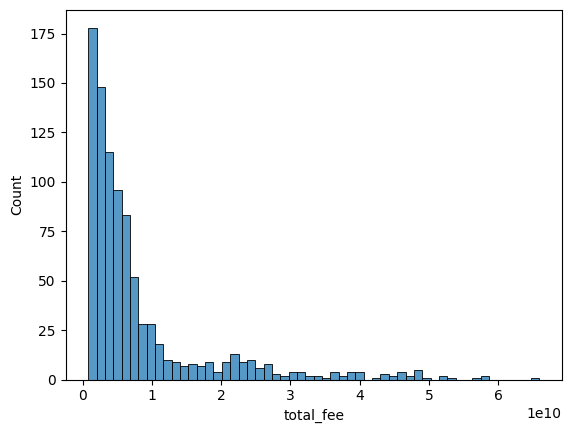

In [34]:
# histplot to see the distribution
sns.histplot(data=global_data.total_fee)

We can see that there is a huge value (1e10), we will look at this value later.

Now, we will see if the hypothesis that larger transactions (such as those with many inputs and outputs) have a higher fee is true or not.

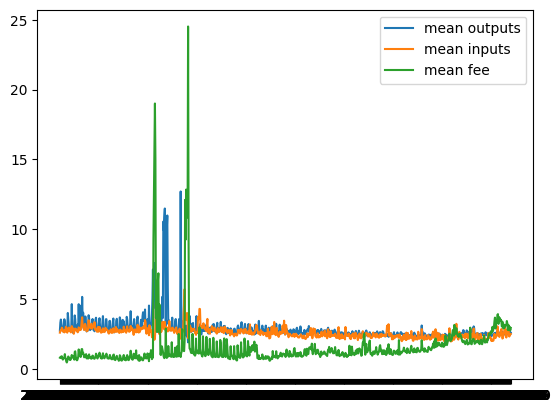

In [35]:
# Plot mean outputs, mean inputs and ,mean fee to show a potential tendance.
plt.plot(global_data.index, global_data.mean_nb_outputs, label="mean outputs")
plt.plot(global_data.index, global_data.mean_nb_inputs, label="mean inputs")
plt.plot(global_data.index, global_data.mean_fee_for100, label="mean fee")

plt.legend()
plt.show()

# QUESTION A POSER, COMMENT PLOT PROPREMENT LES DATES CHAQUE 5 MOIS.
# DEMANDER SI IL FAUT FAIRE UN SCATTER PLOT LA PARCE QUE JE LE TROUVE PAS SIGNIFICATIF

Show the correlation between the number of transactions and the transaction's fees.

<Axes: xlabel='nb_transactions', ylabel='total_fee'>

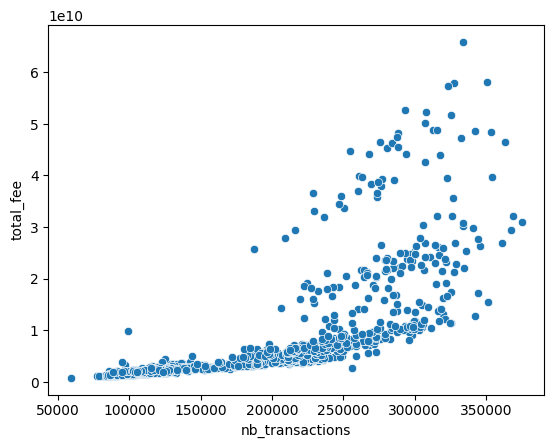

In [36]:
# Scatter plot to show correlation
sns.scatterplot(data=global_data, x='nb_transactions', y='total_fee')

# DEMANDER SI YA BIEN UNE CORRELATION OU SI JE ME FAIS DES FILMS

Now, we are going to see if the assumption that the amount of Bitcoin sent is not correlated to the transactions fees.

<Axes: xlabel='nb_transactions', ylabel='mean_fee_for100'>

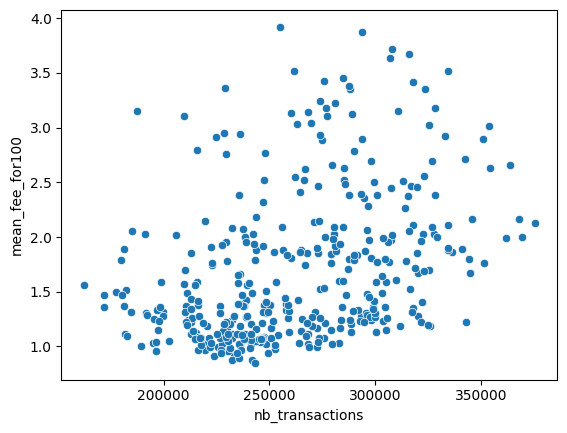

In [94]:
sns.scatterplot(data=global_data, x='nb_transactions', y='mean_fee_for100')
#sns.lineplot(data=global_data, x='date', y='nb_transactions')

<Axes: xlabel='date', ylabel='mean_feeUSD'>

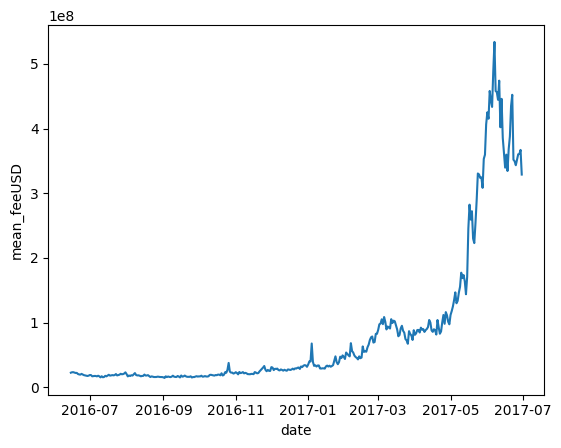

In [92]:
sns.lineplot(data=global_data, x='date', y='mean_feeUSD')

In [38]:

t = global_data.reset_index(names='date')
df = t.merge(external_data, how='inner', on=['date'])


fig = px.scatter(df[df.year == 2016], x='nb_transactions', y='total_fee',
                 log_x=True, size='PriceUSD', size_max=10)
fig


# SUPER INTERESSANT PUISQU'ON VOIT UN POINT COMPLETEMENT EN HAUT ET C'EST SUREMENT DU A  UNE CHUTE DU PRIX DU BTC

AttributeError: 'DataFrame' object has no attribute 'year'

In [ ]:
## calculate the change in price between two consecutive months
df['PriceChange'] = np.abs(df['PriceUSD'] - df['PriceUSD'].shift(1))

# Add the value of 0 for the first price change
df['PriceChange'] = df['PriceChange'].fillna(0)
#df.loc[df.PriceChange > 200, :]

# create a new column with True if price change is higher than 200, else False
df['HighChange'] = df['PriceChange'] > 100

fig = px.scatter(df, x='date', y='total_fee',
                 color='HighChange',
                 #log_x=True, size_max=10
                )
fig

plt.figure(figsize=(13, 6))


test = df.loc[df.year_x == 2015]
lol = test.groupby('month_x').agg({'total_fee': 'sum',
                                                   'mean_feeUSD': 'sum',
                             'PriceChange': 'sum'
                                                  
                                                                                     })
lol['HighChange'] = lol['PriceChange'] > 300


sns.scatterplot(data=lol, x=lol.index, y='total_fee', hue='HighChange')

# FAUDRAIT GROUPER PAR MOIS POUR QU'ON VOIT BIEN

In [ ]:
sns.scatterplot(data=global_data, x='mean_nb_inputs', y='mean_feeUSD')


In [108]:
# Load a file in json format and convert it into DataFrame
def load_json_data(path): 
    # Convert json to DataFrame
    with open(path) as json_data:
        data = json.load(json_data)
        col_name = path[5:-5]
        df = pd.DataFrame(data[col_name])
    
    # Rename columns
    df.rename(columns={'x':'date', 'y':col_name}, inplace=True)

    # Change the timestamp date to the right format.
    df['date'] = df['date'].astype(str)
    df['date'] = df['date'].apply(lambda p: p[:-3])
    df['date'] = df['date'].astype(int)
    
    # Convert timestamp to DateTime
    df['date'] = df['date'].apply(lambda p: datetime.fromtimestamp(p))
    
    # Get the data from June 2016 to June 2017
    df = get_year(df)

    # Take only the date from the DateTime
    df['date'] = df['date'].apply(lambda p: p.date())

    return df

# Return the data from 2016-06-15 to 2017-6-30 of a Dataframe
def get_year(df):
    date_begin = datetime(2016, 6, 15)
    date_end = datetime(2017, 6, 30)
    #df['date'] = df['date'].apply(lambda p: datetime.strptime(p, '%Y-%m-%d'))
    df = df.loc[(df.date >= date_begin) & (df.date <= date_end)]
    return df

    
mempool_size_data = load_json_data('data/mempool-size.json')
avg_block_size_data = load_json_data('data/avg-block-size.json')
n_transactions_per_block_data = load_json_data('data/n-transactions-per-block.json')
avg_confirmation_time = load_json_data('data/avg-confirmation-time.json')

n_transactions_per_block_data

,date,n-transactions-per-block
902,2016-06-15,1705.276316
903,2016-06-18,1489.348101
904,2016-06-21,1665.530201
905,2016-06-24,1842.054264
906,2016-06-27,1476.387755
...,...,...
1024,2017-06-16,1823.898649
1025,2017-06-19,1786.582781
1026,2017-06-22,1940.179856
1027,2017-06-25,1481.303279


# how a miner might select which transactions to include in a block

La reponse on l'a connait faut prendre les higher fees MAIS On se pose quand meme la question de savoir si c'est pas  plus rentable de prendre plusieurs fees avec des valeurs moins eleve.
On peut aussi regarder le block reward (nb de coin created) pour voir si c'est pas plus rentable de vite remplir un bloc peut importe les transactions fees pour avoir un bloc reward

Miners select transactions to include in a block based on a combination of factors, including the transaction fees offered by the sender, the size of the transaction in bytes, and the available space in the block.

When a user sends a Bitcoin transaction, they have the option to include a transaction fee. This fee is paid to the miner who includes the transaction in a block and adds it to the blockchain. Transactions with higher fees are prioritized by miners because they can earn more money by including them in a block.

In addition to the transaction fee, miners also consider the size of the transaction in bytes. Larger transactions take up more space in a block, so miners may prioritize smaller transactions to maximize the number of transactions they can include in a block.

<Axes: xlabel='date', ylabel='mempool-size'>

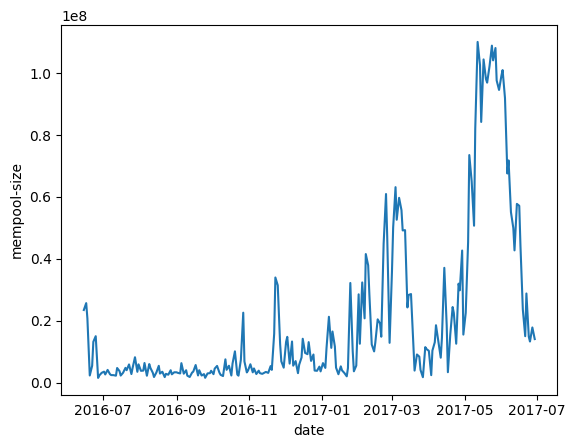

In [98]:
sns.lineplot(data=mempool_size_data, x='date', y='mempool-size')

<Axes: xlabel='date', ylabel='avg-block-size'>

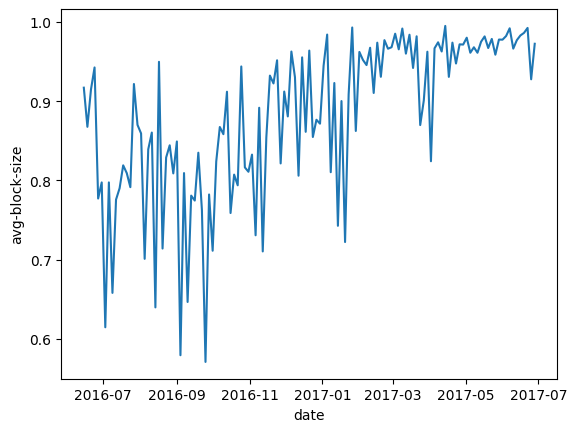

In [100]:
sns.lineplot(data=avg_block_size_data, x='date', y='avg-block-size')

<Axes: xlabel='date', ylabel='n-transactions-per-block'>

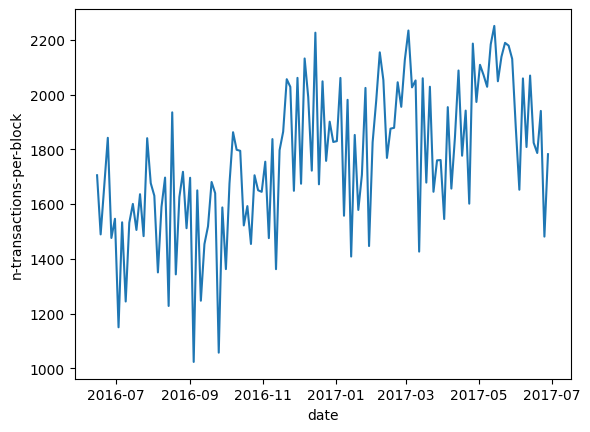

In [99]:
sns.lineplot(data=n_transactions_per_block_data, x='date', y='n-transactions-per-block')

<Axes: xlabel='date', ylabel='nb_transactions'>

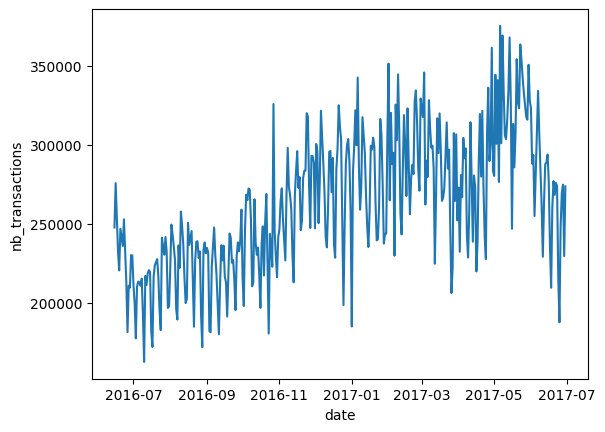

In [102]:
sns.lineplot(data=global_data, x='date', y='nb_transactions')

<Axes: xlabel='date', ylabel='mean_fee_for100'>

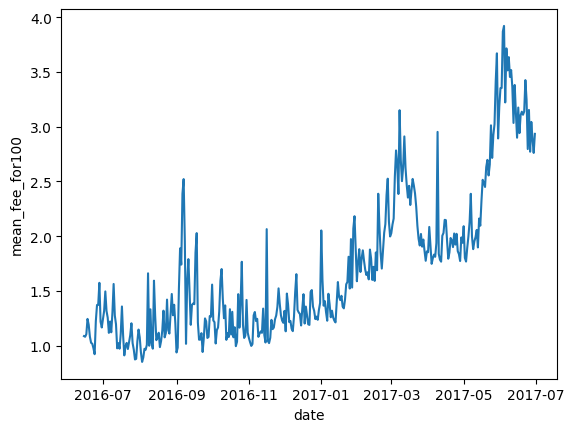

In [105]:
sns.lineplot(data=global_data, x='date', y='mean_fee_fo')

<Axes: xlabel='date', ylabel='avg-confirmation-time'>

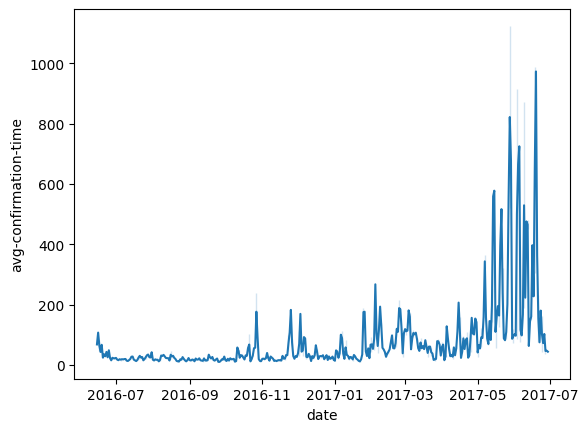

In [109]:
sns.lineplot(data=avg_confirmation_time, x='date', y='avg-confirmation-time')

## 1. Competition between miners

We can start by exploring the relationship between the price of Bitcoin and the HashRate, which is a measure of the computational power used by miners. If the price of Bitcoin is high, we can expect more miners to join the network and compete to add blocks to the blockchain.

We can plot the PriceUSD and HashRate over time to see how they are correlated:



result expected:

From the chart, we can see that there is a strong positive correlation between the price of Bitcoin and the HashRate. This suggests that as the price of Bitcoin increases, more miners join the network, leading to an increase in the HashRate.

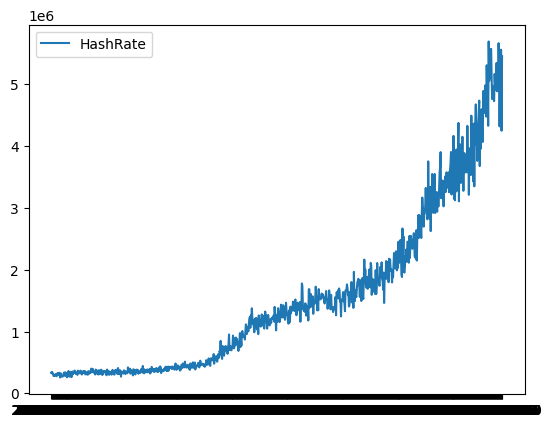

In [106]:
plt.plot(external_data.date, external_data.HashRate, label="HashRate")

plt.legend()
plt.show()

Next, we can explore the relationship between the transaction fees and the likelihood of a transaction being included in a block. Miners prioritize transactions with higher fees, so we can expect to see a correlation between the transaction fee and the time it takes for a transaction to be confirmed.

## 2. More low or higher fees ?

We can start by loading the Blockchain dataset and plotting the distribution of transaction fees:


result expected:

From the chart, we can see that the majority of transactions have low fees, with a few transactions offering significantly higher fees. This suggests that miners have a choice between including more low-fee transactions or fewer high-fee transactions in a block.



## 3. Evolution of nb_transactions and so the size of a block

Voir le nb de transactions dans le temps. Voir aussi le nb inputs and outputs dans le temps. Se renseigner et dire que c'est ca qui definit la size d'un block et on peut donc peut etre creer une nouvelle variable qui simule la taille approximative d'un block


## 4. Top 10 actors

voir si les 10 plus grands acteurs ou certains acteurs en general payent mieux et donc si c'est mieux pour les mineurs de rester a l'affut de certains acteurs.
Toujours dans cette idee de voir si c'est mieux de miner plusieurs petites transactions ou une seule grosse transaction


## Potential conclusion

Based on the exploratory analysis of the three datasets, we can draw some insights into how a miner might select which transactions to include in a block:

The miner may prioritize transactions with higher fees: The mean fee per transaction is relatively stable over time, but there are spikes in the mean feeUSD when the Bitcoin price rises, indicating that users may be willing to pay more in fees when the value of Bitcoin is higher. The mean fee_for100 is also relatively stable, indicating that users tend to pay a similar proportion of their transaction value in fees. Therefore, miners may prioritize transactions with higher fees in order to maximize their earnings.

The miner may prioritize transactions with a higher transaction value: The mean_nb_inputs and mean_nb_outputs are relatively stable over time, indicating that the size of the average transaction is consistent. However, the total_received_satoshi and total_sent_satoshi both show significant increases over time, indicating that the value of transactions being made on the Bitcoin network is increasing. Therefore, miners may prioritize transactions with a higher transaction value in order to maximize their earnings.

The miner may prioritize transactions from certain actors: The top 100 Bitcoin network actors dataset shows that some actors have a higher number of transactions, received or spent amounts, or fees paid. These actors may have more influence on the Bitcoin network and may be more likely to have their transactions included in a block.

The miner may prioritize transactions when the hash rate is higher: The hash rate dataset shows that the hash rate has been increasing steadily over time, indicating that there is more competition among miners to solve the hash puzzle and create a block. Therefore, miners may prioritize transactions when the hash rate is higher in order to have a better chance of solving the hash puzzle and earning the block reward.

It's important to note that there are likely many other factors that a miner might consider when selecting transactions to include in a block, and these factors may vary depending on the specific miner and the current state of the Bitcoin network. However, this exploratory analysis provides some insights into the potential factors that may be important to miners when making these decisions.

In [85]:
# Load a file in json format and convert it into DataFrame
def load_json_data(path): 
    # Convert json to DataFrame
    with open(path) as json_data:
        data = json.load(json_data)
        col_name = path[5:-5]
        df = pd.DataFrame(data[col_name])
    
    # Rename columns
    df.rename(columns={'x':'date', 'y':col_name}, inplace=True)

    # Change the timestamp date to the right format.
    df['date'] = df['date'].astype(str)
    df['date'] = df['date'].apply(lambda p: p[:-3])
    df['date'] = df['date'].astype(int)
    
    # Convert timestamp to DateTime
    df['date'] = df['date'].apply(lambda p: datetime.fromtimestamp(p))
    
    # Get the data from June 2016 to June 2017
    df = get_year(df)

    # Take only the date from the DateTime
    df['date'] = df['date'].apply(lambda p: p.date())

    return df

# Return the data from 2016-06-15 to 2017-6-30 of a Dataframe
def get_year(df):
    date_begin = datetime(2016, 6, 15)
    date_end = datetime(2017, 6, 30)
    df['date'] = df['date'].apply(lambda p: datetime.strptime(p, '%Y-%m-%d'))
    df = df.loc[(df.date >= date_begin) & (df.date <= date_end)]
    return df

    
df = load_json_data('data/mempool-size.json')
df

date             object
mempool-size    float64
dtype: object